In [1]:
import json
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#root_dir = '/home/nikhil/Documents/annotations/'
#json_file = 'ann.json'
root_dir = '/aimldl-dat/data-public/tusimple-sub/train_set/'
#json_file = 'label_data_0313.json'
#json_file = 'label_data_0531.json'
json_file = 'label_data_0601.json'
print(root_dir)
print(json_file)

/aimldl-dat/data-public/tusimple-sub/train_set/
label_data_0601.json


In [3]:
with open(root_dir + json_file, 'r') as file:
  json_lines = file.readlines()
  res_lanes = {'0_lanes':0,'1_lanes':0,'2_lanes':0,'3_lanes':0,'4_lanes':0}
  for line_index,val in enumerate(json_lines):
    #print(line_index)
    json_line = json_lines[line_index]
    sample = json.loads(json_line)
    lanes = sample['lanes']
    res_lane = []
    #print(len(lanes))
    for lane in lanes:
      lane_id_found=False
      for lane_id in lane:
        if lane_id == -2:
          continue
        else:
          lane_id_found=True
          break
      if lane_id_found:
        res_lane.append(lane)        
    #print(len(res_lane))
    if len(res_lane) == 0:
      res_lanes['0_lanes']=res_lanes['0_lanes']+1
    elif len(res_lane) == 1:
      res_lanes['1_lanes']=res_lanes['1_lanes']+1
    elif len(res_lane) == 2:
      res_lanes['2_lanes']=res_lanes['2_lanes']+1
    elif len(res_lane) == 3:
      res_lanes['3_lanes']=res_lanes['3_lanes']+1
    elif len(res_lane) == 4:
      res_lanes['4_lanes']=res_lanes['4_lanes']+1
  print(res_lanes)

{'0_lanes': 0, '1_lanes': 0, '2_lanes': 0, '3_lanes': 92, '4_lanes': 79}


In [4]:
x = list(res_lanes.keys())
y = list(res_lanes.values())

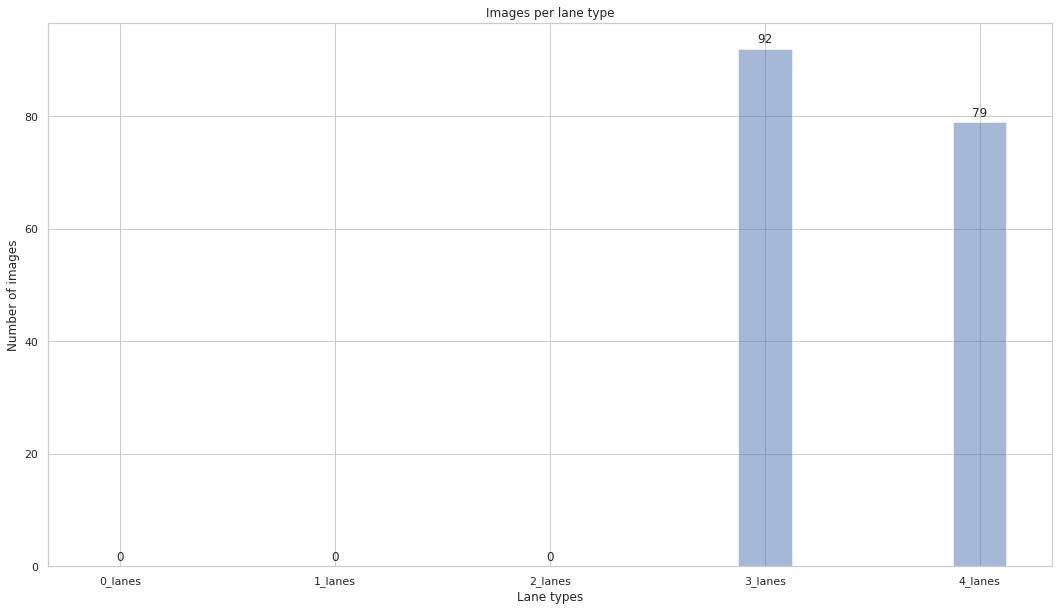

In [12]:
sns.set(style="whitegrid" , color_codes=True)
x_pos_labels = np.arange(len(x))
plt.bar(x_pos_labels, y, align='center', alpha=0.5, width =0.25)
plt.xticks(x_pos_labels, x, rotation = 0)
plt.title('Images per lane type')
plt.xlabel("Lane types")
plt.ylabel("Number of images")
plt.rcParams["figure.figsize"] = [18,10] 
for a,b in zip(x_pos_labels, y):
    c=b+1
    plt.text(a, c, str(b),ha='center')
plt.show()